In [1]:
from sklearn import datasets, metrics, neighbors 
from sklearn import model_selection
from scipy import stats, optimize

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
eps = stats.norm.rvs(loc = 0, scale = 0.2, size = 500)
x = np.linspace(0.0, 250.0, 500, endpoint = False)
y = x*0.5 + 1 + eps

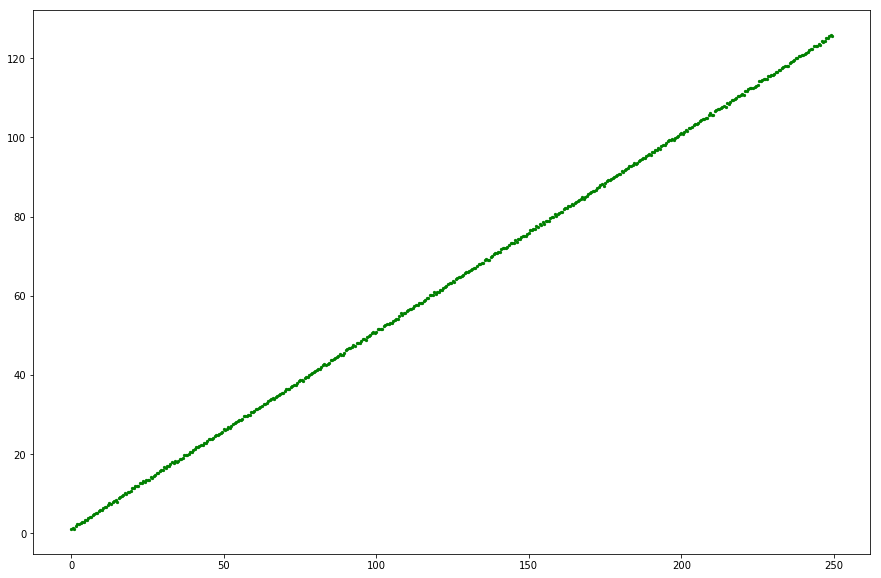

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, s = 5, c = 'g')
plt.show()

In [5]:
def f_mse(z):
    return ((1/500)*np.sum((y-z[0]*x-z[1])**2))
def f_mae(z):
    return((1/500)*np.sum(np.absolute(y-z[0]*x-z[1])))

In [6]:
z_mse = optimize.minimize(f_mse, [1, 0])
print(z_mse)
z = z_mse.x[0]*x + z_mse.x[1]
z_mae = optimize.minimize(f_mae, [1, 0])
print(z_mae)

      fun: 0.039460728579358416
 hess_inv: array([[  9.60003838e-05,  -1.19760479e-02],
       [ -1.19760479e-02,   1.99401197e+00]])
      jac: array([ -9.31322575e-10,  -9.31322575e-10])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49985381,  1.02418692])
      fun: 0.1563418041631941
 hess_inv: array([[  8.26124975e-06,  -1.13773191e-03],
       [ -1.13773191e-03,   2.12677563e-01]])
      jac: array([ 0.132,  0.   ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 251
      nit: 10
     njev: 61
   status: 2
  success: False
        x: array([ 0.49986126,  1.01976759])


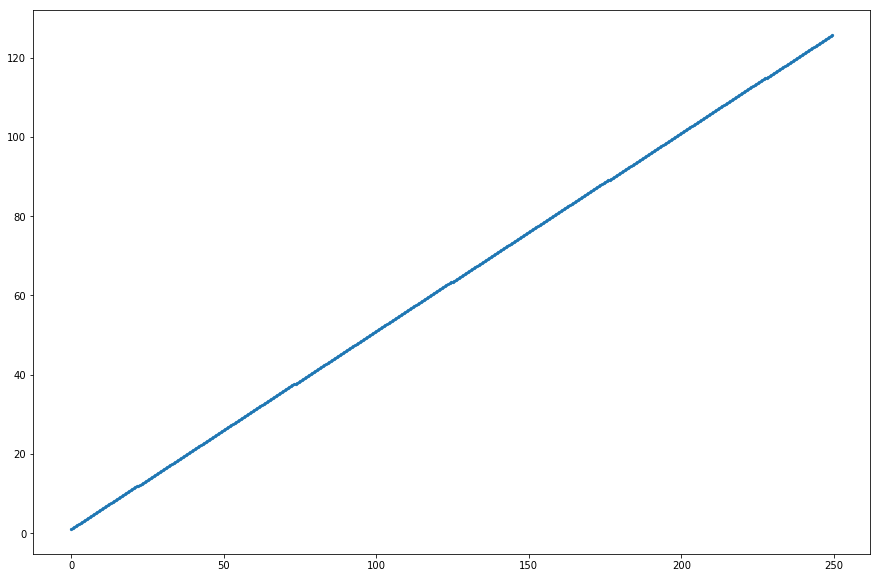

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(x, z, s = 5)
plt.show()

In [8]:
x_new = np.linspace(0.0, 250, 75, endpoint = False)
eps_new = stats.norm.rvs(0.0, 0.2, 75)
y_new = -1 + eps_new

In [9]:
x = np.concatenate((x, x_new), axis = 0)
y = np.concatenate((y, y_new), axis = 0)

In [10]:
z_mse_new = optimize.minimize(f_mse, [1, 0])
print(z_mse_new)
z_1 = z_mse_new.x[0]*x + z_mse_new.x[1]
z_mae_new = optimize.minimize(f_mae, [1, 0])
print(z_mae_new)
z_2 = z_mae_new.x[0]*x + z_mae_new.x[1]

      fun: 700.8198626570714
 hess_inv: array([[  8.34548912e-05,  -1.03946824e-02],
       [ -1.03946824e-02,   1.72944614e+00]])
      jac: array([ -7.62939453e-06,  -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 0.43663207,  0.58854615])
      fun: 9.711267364568233
 hess_inv: array([[  3.95608809e-06,  -4.01538343e-06],
       [ -4.01538343e-06,   9.92915952e-06]])
      jac: array([ 0.03031993,  0.00031996])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 359
      nit: 10
     njev: 87
   status: 2
  success: False
        x: array([ 0.49994556,  0.97859396])


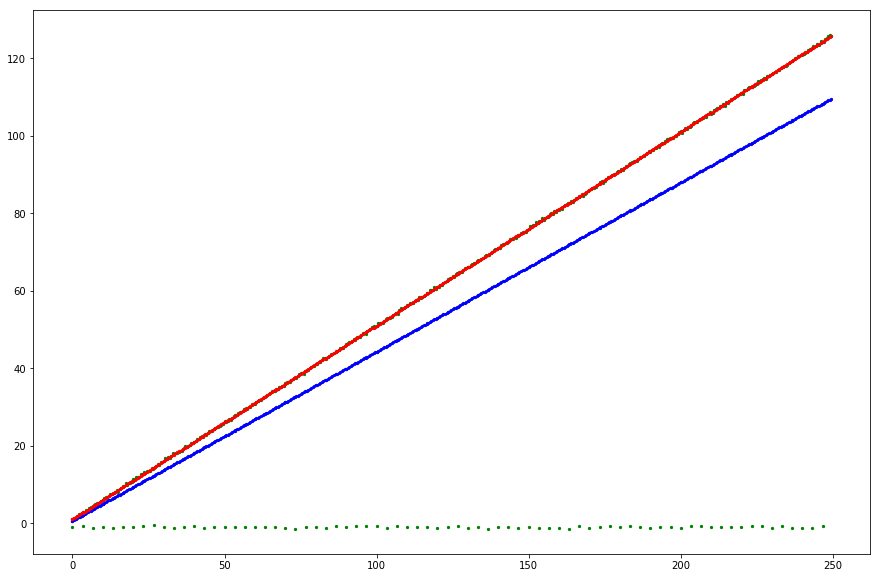

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, s = 5, c = 'g')
plt.scatter(x, z_1, s = 5, c = 'b')
plt.scatter(x, z_2, s = 5, c = 'r')
plt.show()

Зеленая линия - исходные точки, синяя линия - MSE, а красная линия - MAE. Как видно из графика MSE оказалась неустойчивой к выбрасам, в отличие от MAE, которая дала отличный результат. 